<a href="https://colab.research.google.com/github/mrcryptsie/DataXpert60/blob/main/Analyse_RFM_%C3%A0_l%E2%80%99aide_de_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ANALYSE RFM AVEC PYTHON**

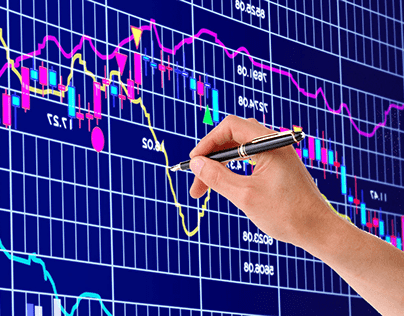

L’analyse RFM est utilisée pour comprendre et segmenter les clients en fonction de leur comportement d’achat. RFM signifie récence, fréquence et valeur monétaire, qui sont trois indicateurs clés qui fournissent des informations sur l’engagement client, la fidélité et la valeur pour une entreprise.

```
DATAXPERT60 !
```



**ANALYSE RFM!!**
*L’analyse RFM est un concept utilisé par les professionnels de la science des données, en particulier dans le domaine du marketing, pour comprendre et segmenter les clients en fonction de leur comportement d’achat.

À l’aide de l’analyse RFM, une entreprise peut évaluer les clients :

récence (la date à laquelle ils ont effectué leur dernier achat)
fréquence (fréquence à laquelle ils font des achats)
et la valeur monétaire (le montant dépensé pour les achats)
La récence, la fréquence et la valeur monétaire d’un client sont trois indicateurs clés qui fournissent des informations sur l’engagement, la fidélité et la valeur d’une entreprise.

Pour effectuer une analyse RFM à l’aide de Python, nous avons besoin d’un jeu de données comprenant les ID client, les dates d’achat et les montants des transactions. Avec ces informations, nous pouvons calculer les valeurs RFM pour chaque client et analyser leurs modèles et comportements.*

In [92]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"


In [93]:
# Importation de la base de données
df = pd.read_csv("/content/drive/MyDrive/DATAXPERT60/rfm_data.csv")

In [94]:
# Lecture des cinq premières ligne de la base de données
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [95]:
# Passons d'abord à une analyse brieve de notre base de données
# Voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


**Valeurs manquantes:** Super notre base de données nous à été livrée avec 0 taux de valeurs manquantes. Ce qui fait que nous n'allons plus nous gêner à traiter les valeurs manquantes car tout est au top.

In [96]:
# Voyons rapidement la dimension de notre base de données
df.shape

(1000, 6)

**Dimension de notre matrice (base de donnée)**: Avec .shape nous avons constaté que notre base de donnée contient 1000 lignes et 6 colonnes

In [97]:
# Voyons rapidement les renseignements de notre base de donnée
df.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location'],
      dtype='object')

**Calcul des valeurs RFM**

*La RFM (Récence, Fréquence, Montant) est une méthode d'analyse utilisée en marketing et en analyse financière pour segmenter les clients ou les données financières en fonction de leur comportement d'achat ou de dépenses. Elle permet de classer les clients ou les transactions en fonction de trois critères principaux :*

**La Récense:**
*La récence fait référence à la période de temps écoulée depuis la dernière transaction ou achat effectué par un client ou une entité financière. Les clients récents sont souvent considérés comme plus actifs et plus susceptibles de réaliser de nouvelles transactions.*

*Pour chaque client ou transaction, calculons le nombre de jours (ou de mois) écoulés depuis la dernière activité. Plus le nombre de jours est faible, plus le score de récence sera élevé.*

In [98]:
# Faisons d'abord un petit travail

In [99]:
# Revisitons une fois de plus notre base de données
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [100]:
import datetime
# Convertissons la colonne PurchaseDate avec datetime
# Importation du module nécessaire
from datetime import datetime
# Convertissons la colonne
df["PurchaseDate"] = pd.to_datetime(df['PurchaseDate'])


In [101]:
# Calculons proprement dit de la Récence
df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date).dt.days


**EXPLICATION:**

df['Recency']: Cela crée une nouvelle colonne appelée "Recence" dans le DataFrame df. Cette colonne sera utilisée pour stocker les valeurs de récence calculées.

(datetime.now().date() - df['PurchaseDate'].dt.date): Cette partie du code calcule la différence entre la date actuelle (au moment de l'exécution) et la colonne "PurchaseDate" du DataFrame df. La méthode datetime.now() retourne un objet de date et heure représentant le moment actuel, puis date() extrait la date uniquement. De même, df['PurchaseDate'].dt.date extrait les dates de la colonne "PurchaseDate" du DataFrame df.

dt.days: Après avoir calculé la différence entre les dates, cette partie extrait le nombre de jours résultant. Cela convertit l'intervalle temporel résultant en une valeur numérique représentant le nombre de jours entre la date actuelle et la date d'achat pour chaque ligne du DataFrame df.


In [102]:
# Donc voyons notre nouvelle colonne créer
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,116
1,2188,2023-04-11,463.70,Product A,176819,London,116
2,4608,2023-04-11,80.28,Product A,340062,New York,116
3,2559,2023-04-11,221.29,Product A,239145,London,116
4,9482,2023-04-11,739.56,Product A,194545,Paris,116


In [103]:
# Voyons toutes les valeurs possibles prises par la récense
df["Recency"].unique()

array([116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104,
       103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56])

**Fréquence**
*Comptons le nombre total de transactions ou d'achats effectués par chaque client ou entité financière pendant une période donnée. Les clients avec un nombre élevé de transactions se verront attribuer un score plus élevé.*

In [104]:
# Calcul de la fréquence
frequency_df = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_df

,CustomerID,OrderID
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


In [105]:
frequency_df.rename(columns={'OrderID': "Frequency"}, inplace=True )
df = df.merge(frequency_df, on='CustomerID', how='left')

**Explication:**
*Ce code effectue le calcul de la fréquence des transactions pour chaque client dans un DataFrame `df` à partir des données contenues dans la colonne "OrderID". Voici une explication ligne par ligne :

1. `frequency_df = df.groupby('CustomerID')['OrderID'].count().reset_index()`: Cette ligne crée un nouveau DataFrame appelé `frequency_df`. La méthode `groupby` est utilisée pour regrouper les données du DataFrame `df` par "CustomerID", puis la méthode `['OrderID'].count()` compte le nombre d'occurrences de chaque "OrderID" pour chaque groupe de clients. Enfin, `reset_index()` est utilisé pour réinitialiser l'index du DataFrame résultant et le convertir en DataFrame tabulaire.

2. `frequency_df.rename(columns={'OrderID': "Frequency"}, inplace=True)`: Cette ligne renomme la colonne "OrderID" du DataFrame `frequency_df` en "Frequency", pour représenter le nombre de transactions (ou la fréquence) pour chaque client.

3. `df = df.merge(frequency_df, on='CustomerID', how='left')`: Cette ligne effectue une jointure entre le DataFrame `df` d'origine et le DataFrame `frequency_df` en utilisant la colonne "CustomerID" comme clé de jointure. La méthode `merge` combine les deux DataFrames en ajoutant la colonne "Frequency" au DataFrame `df`. La jointure est de type "left", ce qui signifie que toutes les lignes du DataFrame `df` sont conservées, même si certaines n'ont pas de correspondance dans le DataFrame `frequency_df`. Les lignes sans correspondance auront simplement la valeur "Frequency" à NaN (non défini).

En résumé, ce code calcule la fréquence des transactions pour chaque client à partir du DataFrame `df` contenant les informations sur les commandes (utilisant la colonne "OrderID"). Il crée ensuite un nouveau DataFrame appelé `frequency_df` pour stocker la fréquence de chaque client, puis joint ce nouveau DataFrame à l'original pour inclure la fréquence dans le DataFrame d'origine. Cela permettra d'analyser le comportement de chaque client en fonction du nombre de transactions qu'il a effectuées.*

In [106]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,116,1
1,2188,2023-04-11,463.70,Product A,176819,London,116,1
2,4608,2023-04-11,80.28,Product A,340062,New York,116,1
3,2559,2023-04-11,221.29,Product A,239145,London,116,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,116,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,56,1
996,6669,2023-06-10,941.50,Product C,987025,New York,56,1
997,8836,2023-06-10,545.36,Product C,512842,London,56,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,56,1


**Calcul du Montant**
*:Calculons le montant total des dépenses ou des revenus générés par chaque client ou entité financière pendant la même période. Les clients ou transactions avec des montants plus élevés obtiendront un score plus élevé.*

In [107]:
# Code
monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.rename(columns={'TransactionAmount':'MonetaryValue'}, inplace=True)
df = df.merge(monetary_df, on='CustomerID', how='left')

Ce code effectue le calcul de la valeur monétaire totale des transactions pour chaque client dans un DataFrame `df` à partir des données contenues dans la colonne "TransactionAmount". Voici une explication ligne par ligne :

1. `monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()`: Cette ligne crée un nouveau DataFrame appelé `monetary_df`. La méthode `groupby` est utilisée pour regrouper les données du DataFrame `df` par "CustomerID", puis la méthode `['TransactionAmount'].sum()` calcule la somme de tous les montants de transactions pour chaque groupe de clients. Enfin, `reset_index()` est utilisé pour réinitialiser l'index du DataFrame résultant et le convertir en DataFrame tabulaire.

2. `monetary_df.rename(columns={'TransactionAmount':'MonetaryValue'}, inplace=True)`: Cette ligne renomme la colonne "TransactionAmount" du DataFrame `monetary_df` en "MonetaryValue", pour représenter la valeur monétaire totale des transactions pour chaque client.

3. `df = df.merge(monetary_df, on='CustomerID', how='left')`: Cette ligne effectue une jointure entre le DataFrame `df` d'origine et le DataFrame `monetary_df` en utilisant la colonne "CustomerID" comme clé de jointure. La méthode `merge` combine les deux DataFrames en ajoutant la colonne "MonetaryValue" au DataFrame `df`. La jointure est de type "left", ce qui signifie que toutes les lignes du DataFrame `df` sont conservées, même si certaines n'ont pas de correspondance dans le DataFrame `monetary_df`. Les lignes sans correspondance auront simplement la valeur "MonetaryValue" à NaN (non défini).

En résumé, ce code calcule la valeur monétaire totale des transactions pour chaque client à partir du DataFrame `df` contenant les informations sur les transactions (utilisant la colonne "TransactionAmount"). Il crée ensuite un nouveau DataFrame appelé `monetary_df` pour stocker la valeur monétaire totale pour chaque client, puis joint ce nouveau DataFrame à l'original pour inclure la valeur monétaire totale dans le DataFrame d'origine. Cela permettra d'analyser la contribution monétaire de chaque client en fonction de la somme totale dépensée ou générée.

In [108]:
# Base avec les résultats du RFM
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,116,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,116,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,116,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,116,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,116,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,56,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,56,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,56,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,56,1,729.94


**Calcul des valeurs RFM**

*Nous allons à présent passer au calcul de la récence, la fréquence et des scores monétaires*

In [109]:
# Définissons les critères de scores monétaires pour notre RFM
rencency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

# Calcul des scores RFM
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=rencency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)


**Explication:**
*Ce code définit les critères de scores monétaires pour l'analyse RFM (Récence, Fréquence, Montant) et calcule les scores RFM pour chaque client dans le DataFrame `df`. Voici une explication ligne par ligne :

1. `rencency_scores = [5, 4, 3, 2, 1]`: Cette ligne définit les critères de scores de récence. Les clients les plus récents recevront un score de 5, tandis que les clients les moins récents recevront un score de 1.

2. `frequency_scores = [1, 2, 3, 4, 5]`: Cette ligne définit les critères de scores de fréquence. Les clients les plus fréquents recevront un score de 5, tandis que les clients les moins fréquents recevront un score de 1.

3. `monetary_scores = [1, 2, 3, 4, 5]`: Cette ligne définit les critères de scores monétaires. Les clients ayant dépensé le plus recevront un score de 5, tandis que ceux ayant dépensé le moins recevront un score de 1.

4. `df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=rencency_scores)`: Cette ligne calcule les scores de récence pour chaque client en utilisant la colonne "Recency" du DataFrame `df`. La méthode `pd.cut()` divise les valeurs de la colonne "Recency" en 5 intervalles (bins) égaux et attribue des étiquettes de scores de récence en fonction de ces intervalles. Les étiquettes sont définies à l'aide de la liste `rencency_scores`. Les scores résultants sont stockés dans une nouvelle colonne appelée "RecencyScore" dans le DataFrame `df`.

5. `df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)`: Cette ligne calcule les scores de fréquence pour chaque client en utilisant la colonne "Frequency" du DataFrame `df`. De la même manière que précédemment, les valeurs de la colonne "Frequency" sont divisées en 5 intervalles égaux et des étiquettes de scores de fréquence sont attribuées en fonction de ces intervalles. Les étiquettes sont définies à l'aide de la liste `frequency_scores`. Les scores résultants sont stockés dans une nouvelle colonne appelée "FrequencyScore" dans le DataFrame `df`.

6. `df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)`: Cette ligne calcule les scores monétaires pour chaque client en utilisant la colonne "MonetaryValue" du DataFrame `df`. Encore une fois, les valeurs de la colonne "MonetaryValue" sont divisées en 5 intervalles égaux et des étiquettes de scores monétaires sont attribuées en fonction de ces intervalles. Les étiquettes sont définies à l'aide de la liste `monetary_scores`. Les scores résultants sont stockés dans une nouvelle colonne appelée "MonetaryScore" dans le DataFrame `df`.

Après avoir exécuté ce code, le DataFrame `df` contiendra trois nouvelles colonnes : "RecencyScore", "FrequencyScore" et "MonetaryScore", qui représentent les scores RFM calculés en fonction des critères définis pour chaque client. Ces scores RFM peuvent être utilisés pour segmenter les clients en groupes différents afin d'analyser leur comportement et prendre des décisions stratégiques en fonction de ces segments.*

In [110]:
# Le mieux pour nous pour être à l'aise avec ces données est de les convertir en entier
# Conversion en entiers des données
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

**Segmentation de la valeur RFM:**
*Calculons maintenant le score RFM final et le segment de valeur en fonction des scores*

In [111]:
# Calculons le score RFM de chaque clients
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Création des segments RFM basés sur le résultats des scores RFM
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value_Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

**Explication:**
*Ce code calcule le score RFM (Récence, Fréquence, Montant) de chaque client à partir des scores de récence, de fréquence et de montant précédemment calculés dans le DataFrame `df`. Ensuite, il crée des segments RFM basés sur les résultats des scores RFM pour catégoriser les clients en différentes valeurs. Voici une explication ligne par ligne :

1. `df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']`: Cette ligne calcule le score RFM pour chaque client en additionnant les scores de récence, de fréquence et de montant. Les colonnes "RecencyScore", "FrequencyScore" et "MonetaryScore" ont été calculées précédemment, et maintenant ces valeurs sont additionnées pour obtenir le score RFM global de chaque client. Le résultat est stocké dans une nouvelle colonne appelée "RFM_Score" dans le DataFrame `df`.

2. `segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']`: Cette ligne définit les étiquettes pour les segments RFM basés sur les résultats des scores RFM. Les clients seront regroupés en trois segments : "Low-Value" (faible valeur), "Mid-Value" (valeur moyenne) et "High-Value" (haute valeur).

3. `df['Value_Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)`: Cette ligne crée une nouvelle colonne appelée "Value_Segment" dans le DataFrame `df`, qui contiendra les segments RFM basés sur les scores RFM. La méthode `pd.qcut()` divise les valeurs du score RFM en trois quantiles égaux (q=3), ce qui crée des segments avec approximativement le même nombre de clients dans chaque segment. Les étiquettes de segments définies précédemment sont utilisées pour identifier chaque segment, et les résultats sont stockés dans la colonne "Value_Segment".

Après avoir exécuté ce code, le DataFrame `df` contiendra deux nouvelles colonnes : "RFM_Score", qui représente le score RFM global de chaque client, et "Value_Segment", qui indique le segment RFM auquel chaque client appartient (Low-Value, Mid-Value ou High-Value). Ces segments peuvent être utilisés pour segmenter les clients en fonction de leur comportement d'achat, de leur fidélité et de leur valeur, ce qui permet de mieux comprendre leur profil et de prendre des décisions commerciales adaptées à chaque segment.*

In [112]:
# Vue sur df
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value_Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,116,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,116,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,116,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,116,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,116,1,739.56,1,1,2,4,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,56,1,759.62,5,1,2,8,High-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,56,1,941.50,5,1,2,8,High-Value
997,8836,2023-06-10,545.36,Product C,512842,London,56,1,545.36,5,1,2,8,High-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,56,1,729.94,5,1,2,8,High-Value


In [113]:
# Nous allons maintenant voir la distribution des segments graphiquement

# Distribution des segments de RFM
segment_counts = df['Value_Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Création des bars graphiques
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', color='Value Segment',
                          color_discrete_sequence=pastel_colors,
                          title = 'Distribution par segments des valeurs du RFM')

# Mise à jour
fig_segment_dist.update_layout(xaxis_title='Valeurs des segments du RFM',
                               yaxis_title = 'Nombre',
                               showlegend=False)
# Visualisation proprement dite
fig_segment_dist.show()


**Explication:**
*Ce code réalise la distribution des segments RFM de manière graphique en utilisant un graphique à barres (bar chart) avec la bibliothèque Plotly Express (px). Voici une explication ligne par ligne :

1. `segment_counts = df['Value_Segment'].value_counts().reset_index()`: Cette ligne compte le nombre d'occurrences de chaque segment RFM dans la colonne "Value_Segment" du DataFrame `df`. Les résultats sont stockés dans un nouveau DataFrame appelé `segment_counts`, avec deux colonnes : "Value Segment" (les segments RFM) et "Count" (le nombre d'occurrences de chaque segment).

2. `segment_counts.columns = ['Value Segment', 'Count']`: Cette ligne renomme les colonnes du DataFrame `segment_counts` pour rendre les noms plus explicites. La colonne "Value Segment" représente les segments RFM, et "Count" représente le nombre d'occurrences de chaque segment.

3. `pastel_colors = px.colors.qualitative.Pastel`: Cette ligne définit une palette de couleurs pastel pour utiliser dans le graphique à barres. Cela permettra d'attribuer des couleurs différentes à chaque segment RFM dans le graphique.

4. `fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', color='Value Segment', color_discrete_sequence=pastel_colors, title='RFM Value Segment Distribution')`: Cette ligne crée le graphique à barres en utilisant la fonction `px.bar` de Plotly Express. Les données à afficher sont fournies dans le DataFrame `segment_counts`. L'axe x du graphique représente les segments RFM, l'axe y représente le nombre d'occurrences de chaque segment (le nombre de clients dans chaque segment), et les couleurs de barres sont définies par la colonne "Value Segment" pour attribuer une couleur différente à chaque segment. Le titre du graphique est défini comme "RFM Value Segment Distribution".

5. `fig_segment_dist.update_layout(xaxis_title='RFM Value Segment', yaxis_title='Count', showlegend=False)`: Cette ligne met à jour la mise en page du graphique. Elle définit les titres des axes x et y respectivement pour "RFM Value Segment" et "Count". De plus, `showlegend=False` permet de masquer la légende, car les couleurs de barres sont suffisantes pour indiquer les segments RFM.

6. `fig_segment_dist.show()`: Cette ligne affiche le graphique à barres mis à jour pour visualiser la distribution des segments RFM.*

**Segmentatation de clientèle RFM**
*Les segments ci-dessus que nous avons calculés sont des segments de valeur RFM. Nous allons maintenant calculer les segments de clientèle RFM. Le segment de valeur RFM représente la catégorisation des clients en fonction de leurs scores RFM en groupes tels que « valeur faible », « valeur moyenne » et « valeur élevée ». Ces segments sont déterminés en divisant les scores RFM en plages ou groupes distincts, ce qui permet une analyse plus granulaire des caractéristiques RFM globales des clients. Le segment de valeur RFM nous aide à comprendre la valeur relative des clients en termes de récence, de fréquence et d’aspects monétaires.

Créons et analysons maintenant des segments de clientèle RFM qui sont des classifications plus larges basées sur les scores RFM. Ces segments, tels que « Champions », « Loyalistes potentiels » et « Ne peut pas perdre », offrent une perspective plus stratégique sur le comportement et les caractéristiques des clients en termes de récence, de fréquence et d’aspects monétaires. Voici comment créer les segments de clientèle RFM :*

In [114]:
# Création des nouvelles colonnes pour la segmentation
df['RFM Customer Segments'] = ''

# Agsigner les segments RFM basés sur les scores RFM
df.loc[df['RFM_Score']  >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score']  >= 6) & (df['RFM_Score'] < 9),'RFM Customer Segments'] = 'Clients Potentiellement Loyaux'
df.loc[(df['RFM_Score']  >= 5) & (df['RFM_Score'] < 6),'RFM Customer Segments'] = 'Clients à risque'
df.loc[(df['RFM_Score']  >= 4) & (df['RFM_Score'] < 5),'RFM Customer Segments'] = 'Ne peut pas perdre'
df.loc[(df['RFM_Score']  >= 3) & (df['RFM_Score'] < 4),'RFM Customer Segments'] = 'Perdre'

# Affichage
df[['CustomerID', 'RFM Customer Segments']]

,CustomerID,RFM Customer Segments
0,8814,Ne peut pas perdre
1,2188,Perdre
2,4608,Perdre
3,2559,Perdre
4,9482,Ne peut pas perdre
...,...,...
995,2970,Clients Potentiellement Loyaux
996,6669,Clients Potentiellement Loyaux
997,8836,Clients Potentiellement Loyaux
998,1440,Clients Potentiellement Loyaux


**Explication:**
*Ce code effectue la segmentation des clients en fonction de leur score RFM (Récence, Fréquence, Montant) et crée une nouvelle colonne "RFM Customer Segments" pour stocker le segment RFM auquel chaque client appartient. Voici une explication ligne par ligne :

1. `df['RFM Customer Segments'] = ''`: Cette ligne crée une nouvelle colonne appelée "RFM Customer Segments" dans le DataFrame `df`. Cette colonne sera utilisée pour stocker les segments RFM des clients.

2. `df.loc[df['RFM_Score']  >= 9, 'RFM Customer Segments'] = 'Champions'`: Cette ligne attribue le segment "Champions" aux clients dont le score RFM est supérieur ou égal à 9. Ces clients sont considérés comme les meilleurs ou les plus fidèles en fonction de leur score RFM élevé.

3. `df.loc[(df['RFM_Score']  >= 6) & (df['RFM_Score'] < 9),'RFM Customer Segments'] = 'Clients Potentiellement Loyaux'`: Cette ligne attribue le segment "Clients Potentiellement Loyaux" aux clients dont le score RFM est compris entre 6 et 8 (inclus). Ces clients présentent un potentiel de fidélité élevé mais ne sont pas encore dans la catégorie des "Champions".

4. `df.loc[(df['RFM_Score']  >= 5) & (df['RFM_Score'] < 6),'RFM Customer Segments'] = 'Clients à risque'`: Cette ligne attribue le segment "Clients à risque" aux clients dont le score RFM est compris entre 5 et 5.99. Ces clients présentent un risque de baisse de leur engagement ou de leur fidélité.

5. `df.loc[(df['RFM_Score']  >= 4) & (df['RFM_Score'] < 5),'RFM Customer Segments'] = 'Ne peut pas perdre'`: Cette ligne attribue le segment "Ne peut pas perdre" aux clients dont le score RFM est compris entre 4 et 4.99. Ces clients sont susceptibles de rester fidèles à l'entreprise.

6. `df.loc[(df['RFM_Score']  >= 3) & (df['RFM_Score'] < 4),'RFM Customer Segments'] = 'Perdre'`: Cette ligne attribue le segment "Perdre" aux clients dont le score RFM est compris entre 3 et 3.99. Ces clients présentent un risque élevé de désengagement ou de perte.

7. `df[['CustomerID', 'RFM Customer Segments']]`: Cette ligne affiche uniquement les colonnes "CustomerID" et "RFM Customer Segments" du DataFrame `df`, montrant ainsi le résultat final de la segmentation des clients en fonction de leur score RFM.

En résumé, ce code crée une nouvelle colonne pour stocker les segments RFM des clients, puis assigne un segment spécifique à chaque client en fonction de son score RFM. Ces segments RFM peuvent être utilisés pour mieux comprendre le comportement des clients et prendre des décisions stratégiques adaptées à chaque segment.*

# **Analyse RFM**
*Analysons maintenant la répartition des clients entre différents segments de clientèles RFM au sein de chaque segment de valeur*

In [115]:
# Code
segment_product_counts = df.groupby(['Value_Segment','RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value_Segment', 'RFM Customer Segments'],
                                         values = 'Count',
                                         color = 'Value_Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title = 'Segments de clients RFM par valeur')
fig_treemap_segment_product.show()

**Explication**
*Ce code effectue une analyse des segments de clients RFM par valeur et crée un graphique treemap (carte arborescente) pour visualiser les résultats. Voici une explication ligne par ligne :

1. `segment_product_counts = df.groupby(['Value_Segment','RFM Customer Segments']).size().reset_index(name='Count')`: Cette ligne groupe les données du DataFrame `df` en fonction des colonnes "Value_Segment" et "RFM Customer Segments", puis compte le nombre d'occurrences de chaque combinaison de ces deux colonnes. Les résultats sont stockés dans un nouveau DataFrame appelé `segment_product_counts`, avec trois colonnes : "Value_Segment" (les segments RFM par valeur), "RFM Customer Segments" (les segments RFM par type de client) et "Count" (le nombre d'occurrences de chaque combinaison).

2. `segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)`: Cette ligne trie les données du DataFrame `segment_product_counts` en fonction de la colonne "Count" (nombre d'occurrences) dans l'ordre décroissant, de sorte que les combinaisons avec le plus grand nombre d'occurrences apparaissent en premier.

3. `fig_treemap_segment_product = px.treemap(segment_product_counts, path=['Value_Segment', 'RFM Customer Segments'], values='Count', color='Value_Segment', color_discrete_sequence=px.colors.qualitative.Pastel, title='Segments de clients RFM par valeur')`: Cette ligne crée un graphique treemap en utilisant la fonction `px.treemap` de Plotly Express. Les données à afficher sont fournies dans le DataFrame `segment_product_counts`. Le treemap permet de visualiser les segments RFM par valeur et les segments RFM par type de client de manière hiérarchique. La hiérarchie est définie par le chemin (`path`) constitué des colonnes "Value_Segment" et "RFM Customer Segments". Les valeurs (`values`) à afficher sont celles de la colonne "Count" (le nombre d'occurrences). La couleur du treemap est définie par la colonne "Value_Segment" pour attribuer une couleur différente à chaque segment RFM par valeur. Le titre du graphique est défini comme "Segments de clients RFM par valeur".

4. `fig_treemap_segment_product.show()`: Cette ligne affiche le graphique treemap pour visualiser les segments de clients RFM par valeur et par type de client. Le treemap permet de voir visuellement les proportions et les relations entre les différents segments, en fonction du nombre d'occurrences de chaque combinaison.*

**Analysons maintenant la distribution des valeurs RFM au sein du segment Champions**

In [116]:
# Filtrer les données pour inclure uniquement les clients du segment "Champions".
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

# Palace des figures
fig = go.Figure()
fig.add_trace(go.Box(y = champions_segment['RecencyScore'], name= 'Recency'))
fig.add_trace(go.Box(y = champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution des valeurs RFM dans le segment "Champions".',
                  yaxis_title='RFM Value',
                  showlegend=True)
fig.show()

**Explication:**
*Ce code réalise une analyse des valeurs RFM (Récence, Fréquence, Montant) pour le segment "Champions" et crée un graphique à boîtes (box plot) pour visualiser la distribution de ces valeurs. Voici une explication ligne par ligne :

1. `champions_segment = df[df['RFM Customer Segments'] == 'Champions']`: Cette ligne filtre les données du DataFrame `df` pour inclure uniquement les clients du segment "Champions". Cela crée un nouveau DataFrame appelé `champions_segment` contenant uniquement les données des clients appartenant au segment "Champions".

2. `fig = go.Figure()`: Cette ligne crée un objet Figure à partir de la bibliothèque Plotly pour créer un graphique.

3. `fig.add_trace(go.Box(y = champions_segment['RecencyScore'], name= 'Recency'))`: Cette ligne ajoute un graphique à boîtes (box plot) à la Figure pour visualiser la distribution des scores de récence (RecencyScore) dans le segment "Champions". Le graphique à boîtes montre la médiane, les quartiles et les valeurs aberrantes pour les scores de récence.

4. `fig.add_trace(go.Box(y = champions_segment['FrequencyScore'], name='Frequency'))`: Cette ligne ajoute un autre graphique à boîtes à la Figure pour visualiser la distribution des scores de fréquence (FrequencyScore) dans le segment "Champions".

5. `fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))`: Cette ligne ajoute un troisième graphique à boîtes à la Figure pour visualiser la distribution des scores monétaires (MonetaryScore) dans le segment "Champions".

6. `fig.update_layout(title='Distribution des valeurs RFM dans le segment "Champions".', yaxis_title='RFM Value', showlegend=True)`: Cette ligne met à jour la mise en page de la Figure en ajoutant un titre ("Distribution des valeurs RFM dans le segment "Champions"."), en définissant le titre de l'axe y ("RFM Value") et en indiquant que la légende doit être affichée.

7. `fig.show()`: Cette ligne affiche la Figure complète contenant les trois graphiques à boîtes pour visualiser la distribution des valeurs RFM (Récence, Fréquence, Montant) dans le segment "Champions". Le graphique permet de voir visuellement la répartition des scores RFM au sein de ce segment particulier.*

**Analysons à présent la corrélation entre la récense, la fréquence et les scores monétaires au sein du segment des champions**

In [117]:
# Code
correlation_matrix = champions_segment[['RecencyScore', 'Frequency', 'MonetaryScore']].corr()

# Visualisation de la corrélation des matrices en utilisant le heatmap
fig_heatmap =go.Figure(data=go.Heatmap(
                        z=correlation_matrix.values,
                        x= correlation_matrix.columns,
                        y=correlation_matrix.columns,
                        colorscale='RdBu',
                        colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Matrice de corrélation de la RFM')

fig_heatmap.show()

**Explication:**
*Ce code réalise une analyse de corrélation entre les scores RFM (Récence, Fréquence, Montant) dans le segment "Champions" et crée un graphique de corrélation sous forme de heatmap (carte de chaleur) pour visualiser les relations entre ces scores. Voici une explication ligne par ligne :

1. `correlation_matrix = champions_segment[['RecencyScore', 'Frequency', 'MonetaryScore']].corr()`: Cette ligne calcule la matrice de corrélation entre les colonnes "RecencyScore" (score de récence), "Frequency" (fréquence) et "MonetaryScore" (score monétaire) du DataFrame `champions_segment`. La méthode `corr()` calcule les corrélations entre ces colonnes et stocke les résultats dans un DataFrame appelé `correlation_matrix`.

2. `fig_heatmap = go.Figure(data=go.Heatmap(`: Cette ligne crée un objet Figure à partir de la bibliothèque Plotly pour créer un graphique de corrélation sous forme de heatmap.

3. `z=correlation_matrix.values`: Cette ligne spécifie les valeurs de la heatmap, qui correspondent à la matrice de corrélation calculée précédemment (`correlation_matrix.values`).

4. `x=correlation_matrix.columns`: Cette ligne définit les valeurs de l'axe x du heatmap en utilisant les noms des colonnes de la matrice de corrélation (`RecencyScore`, `Frequency`, `MonetaryScore`).

5. `y=correlation_matrix.columns`: Cette ligne définit les valeurs de l'axe y du heatmap en utilisant les mêmes noms de colonnes que pour l'axe x.

6. `colorscale='RdBu'`: Cette ligne spécifie l'échelle de couleurs à utiliser pour représenter les valeurs de corrélation. 'RdBu' est une échelle de couleurs allant du rouge au bleu pour représenter les valeurs positives et négatives de corrélation respectivement.

7. `colorbar=dict(title='Correlation'))`: Cette ligne définit la légende (colorbar) du heatmap avec le titre "Correlation" pour indiquer la signification de l'échelle de couleurs.

8. `fig_heatmap.update_layout(title='Matrice de corrélation de la RFM')`: Cette ligne met à jour la mise en page de la Figure en ajoutant le titre "Matrice de corrélation de la RFM".

9. `fig_heatmap.show()`: Cette ligne affiche la Figure complète contenant le heatmap de corrélation pour visualiser les relations entre les scores RFM (Récence, Fréquence, Montant) dans le segment "Champions". Le heatmap permet de voir visuellement les niveaux de corrélation entre les différentes paires de scores RFM. Les couleurs et les valeurs indiquent la force et la direction des corrélations (positives ou négatives).*

In [118]:
# Jettons un coup d'oeil au nombre de clients dans chaque segment
import plotly.colors
pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = df['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                             marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a differents color
champions_color = 'rgb(158,202,225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color = 'rgb(8, 48, 107)',
                  marker_line_width = 1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparaison des segments RFM',
                  xaxis_title='Segments RFM',
                  yaxis_title='Nombre de clients',
                  showlegend=False)

# Affichage
fig.show()

**Explication:**
*Ce code permet de comparer le nombre de clients dans chaque segment RFM en utilisant un graphique à barres coloré. Voici une explication ligne par ligne :

1. `import plotly.colors`: Cette ligne importe la bibliothèque Plotly.colors.

2. `pastel_colors = plotly.colors.qualitative.Pastel`: Cette ligne définit une palette de couleurs pastel à utiliser dans le graphique à barres.

3. `segment_counts = df['RFM Customer Segments'].value_counts()`: Cette ligne compte le nombre de clients dans chaque segment RFM en utilisant la méthode `value_counts()` sur la colonne 'RFM Customer Segments' du DataFrame `df`. Les résultats sont stockés dans la série `segment_counts`.

4. `fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values, marker=dict(color=pastel_colors))])`: Cette ligne crée un graphique à barres en utilisant la fonction `go.Figure()` de Plotly Express. Les données à afficher sont fournies dans un objet Bar (`go.Bar()`) avec l'axe x représentant les noms de segments RFM (obtenus à partir de `segment_counts.index`) et l'axe y représentant le nombre de clients dans chaque segment (obtenu à partir de `segment_counts.values`). Les barres sont colorées avec la palette de couleurs pastel définie précédemment.

5. `champions_color = 'rgb(158,202,225)'`: Cette ligne définit une couleur spécifique (bleu clair) pour le segment "Champions".

6. `fig.update_traces(...)`: Cette ligne met à jour les propriétés des traces du graphique. Elle définit la couleur des barres pour chaque segment en utilisant une expression conditionnelle (`if segment == 'Champions'`) pour attribuer la couleur bleu clair uniquement au segment "Champions". Les autres segments utilisent les couleurs de la palette pastel.

7. `fig.update_layout(...)`: Cette ligne met à jour la mise en page du graphique. Elle définit le titre du graphique, les titres des axes x et y, et masque la légende (`showlegend=False`) car elle n'est pas nécessaire dans ce graphique à barres simple.

8. `fig.show()`: Cette ligne affiche le graphique à barres pour comparer le nombre de clients dans chaque segment RFM. Chaque barre est colorée en fonction du segment RFM correspondant, et le segment "Champions" est mis en évidence avec une couleur bleu clair distincte.*

In [119]:
# Voyons à présent la récense, la fréquence et le scores monétaires de tous les segments
## Calculons les scores moyens de Récence, Fréquence et Montant pour chaque segment
segment_scores = df.groupby('RFM Customer Segments')['RecencyScore', 'FrequencyScore', 'MonetaryScore'].mean().reset_index()

# Créeons un graphique à barres groupées pour comparer les scores des segments.

fig = go.Figure()

# Ajoutons des barres pour les scores de Récence (Recency)

fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],
                     y=segment_scores['RecencyScore'],
                     name = 'Recency Score',
                     marker_color = 'rgb(158,202,225)'
                  ))

# Ajoutons des barres pour les scores de Frequence (Frequency)
fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],
                     y=segment_scores['FrequencyScore'],
                     name='Frequency Score',
                     marker_color = 'rgb(94, 158, 217)'))

# Ajouter des barres pour les scores Monétaires (Monetary)
fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],
                     y = segment_scores['MonetaryScore'],
                     name = 'Monetary Score',
                     marker_color='rgb(32,102,148)'
                     ))

# Mettre à jour la page graphique
fig.update_layout(
    title = 'Comparaison des segments RFM basés sur la Recence, Fréquence et le score Monétaires ',
    xaxis_title = 'RFM Segments',
    yaxis_title = 'Score',
    barmode = 'group',
    showlegend=True
)

fig.show()

<ipython-input-119-e3e88027d5c1>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Nous sommes à la fin de notre projet d'analyse RFM

###**Articles**
***Analyse RFM (Récence, Fréquence, Montant) pour la segmentation de la clientèle**

**Introduction**

L'analyse RFM est une technique couramment utilisée dans le domaine du marketing et de la gestion de la relation client. Elle permet de segmenter les clients en fonction de leur comportement d'achat, en se basant sur trois critères principaux : la Récence (R), la Fréquence (F) et le Montant (M) des achats effectués. Cette technique fournit des informations précieuses aux entreprises pour mieux comprendre le comportement de leurs clients et personnaliser leurs stratégies de marketing.

**Objectifs de l'analyse RFM**

L'analyse RFM vise à répondre à plusieurs objectifs clés :

1. **Segmentation de la clientèle** : Elle permet de diviser la base de clients en différents groupes homogènes en fonction de leur comportement d'achat, ce qui facilite une meilleure compréhension des préférences et des besoins de chaque segment.

2. **Identification des clients à haut potentiel** : Elle aide à identifier les clients les plus fidèles (Champions) qui contribuent le plus au chiffre d'affaires de l'entreprise, ainsi que les clients à fort potentiel de fidélisation (Clients Potentiellement Loyaux) qui peuvent être encouragés à effectuer davantage d'achats.

3. **Gestion de la relation client** : Elle permet de personnaliser les interactions avec les clients en fonction de leur segment RFM, en proposant des offres spécifiques, des promotions ciblées et des programmes de fidélité adaptés à chaque groupe.

4. **Réactivation des clients inactifs** : Elle aide à identifier les clients à risque (Clients à risque) qui ont effectué des achats il y a longtemps ou avec une fréquence faible, ce qui permet de mettre en place des campagnes pour les réengager.

5. **Optimisation des ressources marketing** : Elle permet de concentrer les efforts de marketing et les ressources sur les segments à haut potentiel, afin d'améliorer le retour sur investissement des campagnes marketing.

**Méthodologie de l'analyse RFM**

La méthode RFM se base sur les trois critères suivants :

1. **Récence (Recency)** : Il s'agit de la période de temps écoulée depuis le dernier achat d'un client. Les clients qui ont effectué un achat récentement sont plus susceptibles d'être actifs et engagés avec l'entreprise.

2. **Fréquence (Frequency)** : Cela représente le nombre total d'achats effectués par un client sur une période donnée. Les clients qui effectuent des achats fréquents sont considérés comme plus fidèles.

3. **Montant (Monetary)** : Il s'agit du montant total dépensé par un client sur une période donnée. Les clients à fort potentiel de valeur sont ceux qui dépensent davantage.

**Étapes de l'analyse RFM avec Python**

Pour réaliser une analyse RFM, nous allons suivre les étapes suivantes :

1. **Collecte des données client** : Nous aurons besoin d'un ensemble de données contenant des informations sur les transactions des clients, y compris la date d'achat, le montant dépensé et l'identifiant du client.

2. **Calcul des scores RFM** : Nous allons calculer les scores de Récence, Fréquence et Montant pour chaque client en fonction de leurs transactions. Plus le score RFM est élevé, plus le client est considéré comme étant actif et fidèle.

3. **Segmentation de la clientèle** : Nous allons diviser les clients en différents groupes en fonction des scores RFM pour obtenir des segments tels que "Champions", "Clients Potentiellement Loyaux", "Clients à risque", etc.

4. **Analyse et interprétation des segments** : Nous allons analyser les caractéristiques de chaque segment et déduire des informations stratégiques pour l'entreprise, telles que les stratégies de marketing ciblées, les programmes de fidélité et les offres spéciales.

**Conclusion**

L'analyse RFM est un outil puissant pour segmenter la clientèle et améliorer la gestion de la relation client. En comprenant mieux le comportement d'achat de chaque segment, les entreprises peuvent prendre des décisions plus éclairées pour maximiser la valeur de leurs clients, augmenter leur fidélité et optimiser leurs ressources marketing. Python offre de nombreuses bibliothèques et outils pour réaliser facilement une analyse RFM à partir de données transactionnelles, ce qui en fait un processus efficace pour les*

**Dans la pratique:**
Pour l'exemple pratique, imaginons que nous ayons un ensemble de données fictives sur les transactions de clients contenant les colonnes suivantes : "CustomerID" (identifiant du client), "PurchaseDate" (date de l'achat), et "TransactionAmount" (montant de la transaction). Nous allons créer un DataFrame avec ces données et procéder à l'analyse RFM.

**Exemple pratique : Analyse RFM**

Commençons par créer le DataFrame avec des données factices :

```python
import pandas as pd
import numpy as np

# Création des données factices
np.random.seed(42)
data = {
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'],
    'PurchaseDate': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'TransactionAmount': np.random.randint(50, 500, size=30)
}

df = pd.DataFrame(data)
```

Maintenant que nous avons notre DataFrame avec les données clients, nous allons procéder à l'analyse RFM.

**Étape 1 : Calcul des scores RFM**

Dans cette étape, nous allons calculer les scores RFM pour chaque client en utilisant les critères de Récence, Fréquence et Montant.

```python
# Calcul de la Récence
df['Recency'] = (pd.to_datetime('2023-09-01') - df['PurchaseDate']).dt.days

# Calcul de la Fréquence
frequency_df = df.groupby('CustomerID')['PurchaseDate'].count().reset_index()
frequency_df.rename(columns={'PurchaseDate': 'Frequency'}, inplace=True)
df = df.merge(frequency_df, on='CustomerID', how='left')

# Calcul du Montant
monetary_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_df, on='CustomerID', how='left')
```

**Étape 2 : Définition des scores RFM**

Nous allons diviser les scores de Récence, Fréquence et Montant en 5 catégories, attribuant un score de 5 pour la catégorie la plus élevée et 1 pour la catégorie la plus basse.

```python
# Définition des critères de scores RFM
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

# Calcul des scores RFM
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)
```

**Étape 3 : Création des segments RFM**

Nous allons maintenant combiner les scores RFM pour chaque client et définir des segments RFM basés sur les résultats des scores RFM.

```python
# Combinaison des scores RFM
df['RFM_Score'] = df['RecencyScore'].astype(str) + df['FrequencyScore'].astype(str) + df['MonetaryScore'].astype(str)

# Définition des segments RFM
segment_labels = ['Champions', 'Clients Potentiellement Loyaux', 'Clients à risque', 'Ne peut pas perdre', 'Perdre']
df['RFM_Segment'] = pd.cut(df['RFM_Score'].astype(int), bins=[111, 234, 345, 453, 543, 555], labels=segment_labels)
```

**Étape 4 : Analyse des segments RFM**

Nous allons maintenant explorer les caractéristiques de chaque segment RFM pour mieux comprendre le comportement de chaque groupe.

```python
# Analyse des segments RFM
segment_counts = df['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Nombre de clients']

# Création du graphique à barres
import plotly.express as px
pastel_colors = px.colors.qualitative.Pastel

fig_segment_dist = px.bar(segment_counts, x='RFM_Segment', y='Nombre de clients', color='RFM_Segment',
                          color_discrete_sequence=pastel_colors,
                          title='Répartition des clients par segment RFM')

fig_segment_dist.update_layout(xaxis_title='Segments RFM',
                               yaxis_title='Nombre de clients',
                               showlegend=False)

fig_segment_dist.show()
```

Ce graphique à barres montrera la répartition des clients dans chaque segment RFM, ce qui permettra de mieux comprendre le comportement de chaque groupe et de prendre des décisions stratégiques en conséquence.

Ceci conclut l'analyse RFM. Vous pouvez explorer davantage en fonction de vos besoins spécifiques et ajuster les critères de segmentation pour mieux répondre aux objectifs de votre entreprise.